<a href="https://colab.research.google.com/github/ArmanAghania/Data-Analysis-Concepts-done-with-Python/blob/main/Multilinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries, Directory, Data

In [ ]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [ ]:
#Libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

#Salaries for Professors
##Description
The 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and Professors in a
college in the U.S. The data were collected as part of the on-going effort of the college's administration to
monitor salary differences between male and female faculty members.
#Usage
Salaries
#Format
A data frame with 397 observations on the following 6 variables.
* rank
  * a factor with levels AssocProf AsstProf Prof
* discipline
  * a factor with levels A (“theoretical” departments) or B (“applied” departments).
* yrs.since.phd
  * years since PhD.
* yrs.service
  * years of service.
* sex
  * a factor with levels Female Male
* salary
  * nine-month salary, in dollars.

##References
Fox J. and Weisberg, S. (2019) An R Companion to Applied Regression, Third Edition, Sage.

In [ ]:
#Load the data
df = pd.read_csv('salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


#Analysing the Data

In [ ]:
#Summary Statistics
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


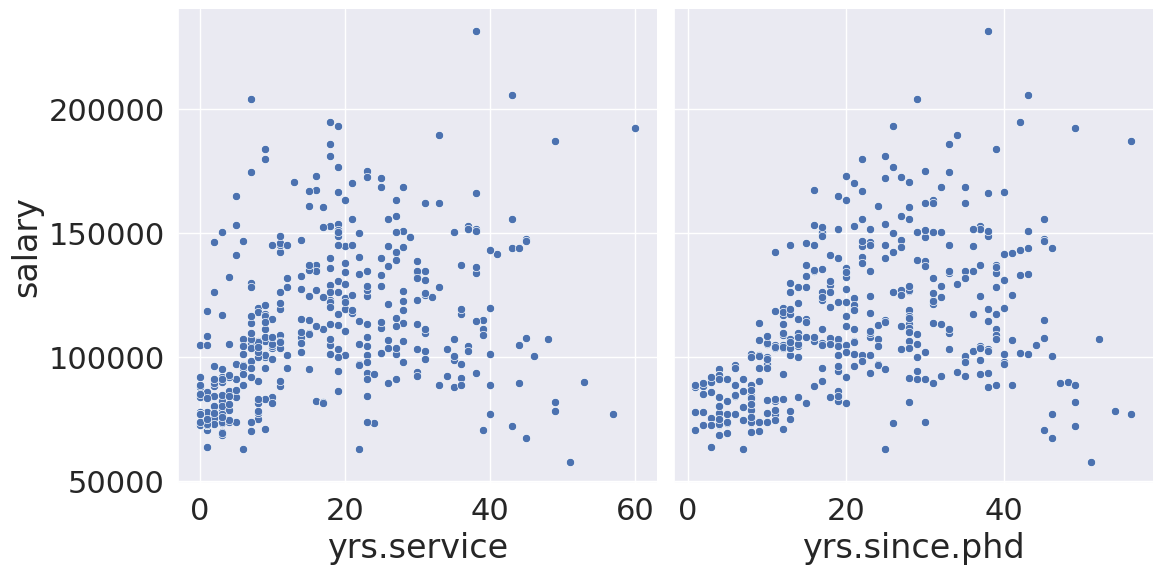

In [ ]:
#Plotting Continiuous IV against dependent variable
sns.set(font_scale = 2)
sns.pairplot(data = df,
             y_vars = ['salary'],
             x_vars = ['yrs.service', 'yrs.since.phd'],
             height = 6)

<ipython-input-7-ba137e094f70>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

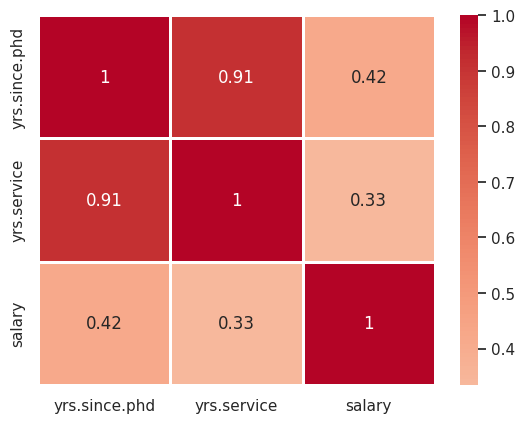

In [ ]:
 #Correlation Matrix
sns.set(font_scale = 1)

sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'white')

In [ ]:
#Categorical Variables
df['rank'].value_counts()
df.select_dtypes(include = 'object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

In [ ]:
#For Loop Categorical Variables
categorical = list(df.select_dtypes(include = 'object'))
for cat in categorical:
  print(df[cat].value_counts())


Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [ ]:
#Look at the Data Set
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [ ]:
#Transform objects into dummmies
df = pd.get_dummies(data =  df, drop_first = True)
df.head()


,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1


#Multilinear Regression Preperation

In [ ]:
#Isolate X and y
y = df.salary / 1000
X = df.drop(columns = ['salary', 'yrs.service'])


In [ ]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1


In [ ]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
X_train.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1
326,1.0,23,0,1,1,1
15,1.0,12,0,1,1,1
354,1.0,8,1,0,1,1


In [ ]:
#Multilinear Regression
model = sm.OLS(y_train, X_train).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.65e-41
Time:                        14:57:48   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

#Accuracy Assessment

In [ ]:
#Predict
predictions = model.predict(X_test)
predictions[0:4]

364    118.590061
30     134.868270
378    118.731635
188     99.876615
dtype: float64

In [ ]:
#Accuracy Assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE', round(mean_absolute_error(y_test, predictions), 1))
print('RMSE', round(np.sqrt(mean_squared_error(y_test, predictions)),1))


MAE 18.2
RMSE 25.8
